In [7]:
import cv2
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras.datasets import mnist
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [5]:
data_root = "C:/Users/Tanishka/handwriting project/A_Z Handwritten Data.csv"

In [8]:
dataset = pd.read_csv(data_root).astype("float32")
dataset.rename(columns={'0': "label"}, inplace=True)

In [9]:
letter_x = dataset.drop("label",axis=1)
letter_y = dataset["label"]
(digit_train_x,digit_train_y),(digit_test_x,digit_test_y)=mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [10]:
letter_x=letter_x.values

In [11]:
print(letter_x.shape,letter_y.shape)
print(digit_train_x.shape,digit_train_y.shape)
print(digit_test_x.shape,digit_test_y.shape)

(372450, 784) (372450,)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
digit_data=np.concatenate((digit_train_x,digit_test_x))
digit_target=np.concatenate((digit_train_y,digit_test_y))

print(digit_data.shape,digit_target.shape)

(70000, 28, 28) (70000,)


In [13]:
digit_target += 26

In [15]:
data = []
for flatten in letter_x:
    image = np.reshape(flatten,(28,28,1))
    data.append(image)
    
letter_data = np.array(data,dtype=np.float32)
letter_target = letter_y

In [16]:
digit_data = np.reshape(digit_data,(digit_data.shape[0],digit_data.shape[1],digit_data.shape[2],1))

In [17]:
print(letter_data.shape,letter_target.shape)
print(digit_data.shape,digit_target.shape)

(372450, 28, 28, 1) (372450,)
(70000, 28, 28, 1) (70000,)


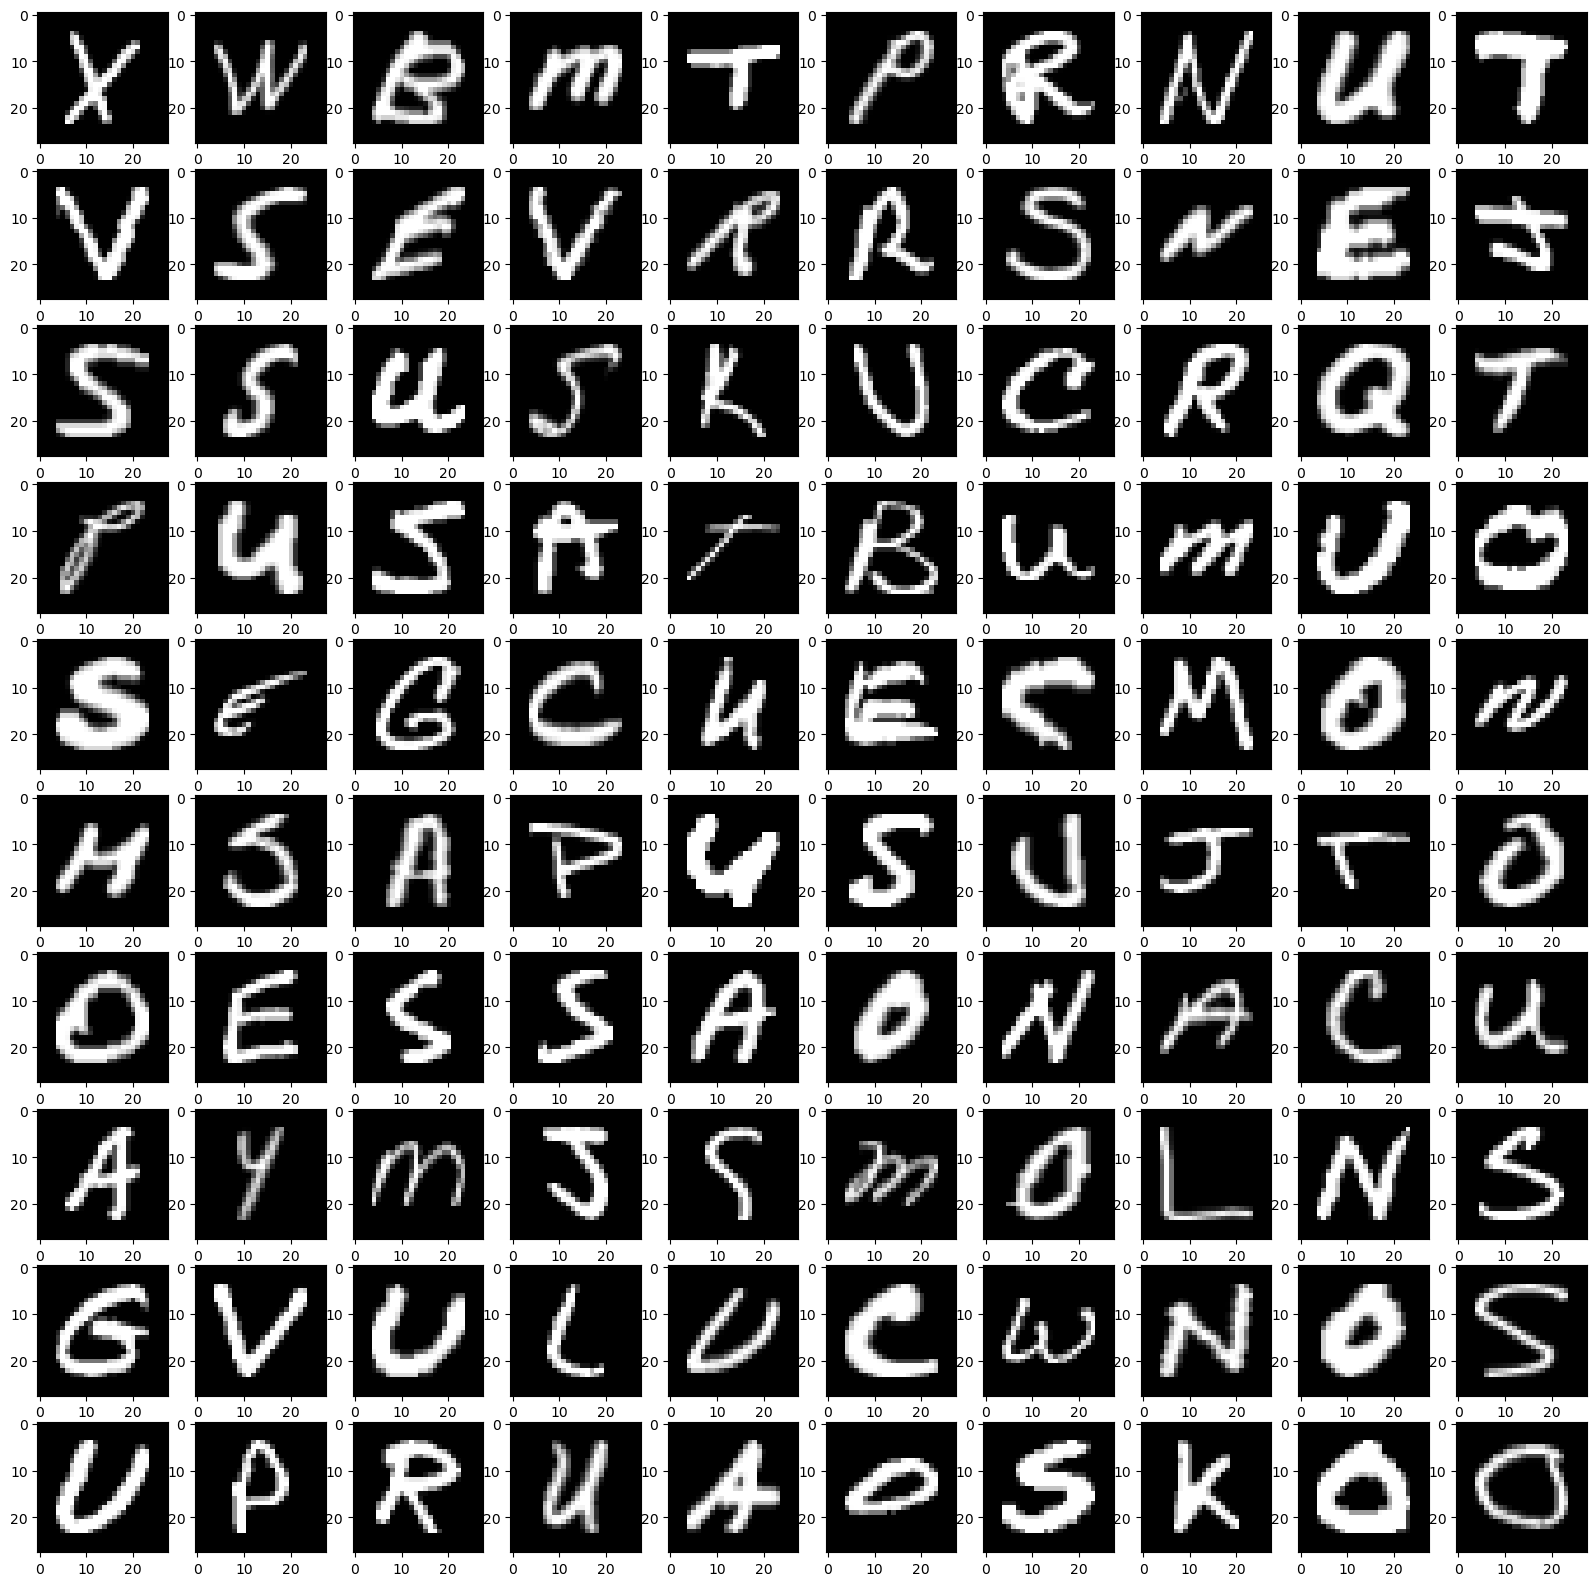

In [19]:
shuffled_data=shuffle(letter_data)
rows,cols=10,10

plt.figure(figsize=(20,20))

for i in range(rows * cols):
    plt.subplot(cols, rows,i+1)
    plt.imshow(shuffled_data[i].reshape(28,28),interpolation="nearest",cmap="gray")
    
plt.show()

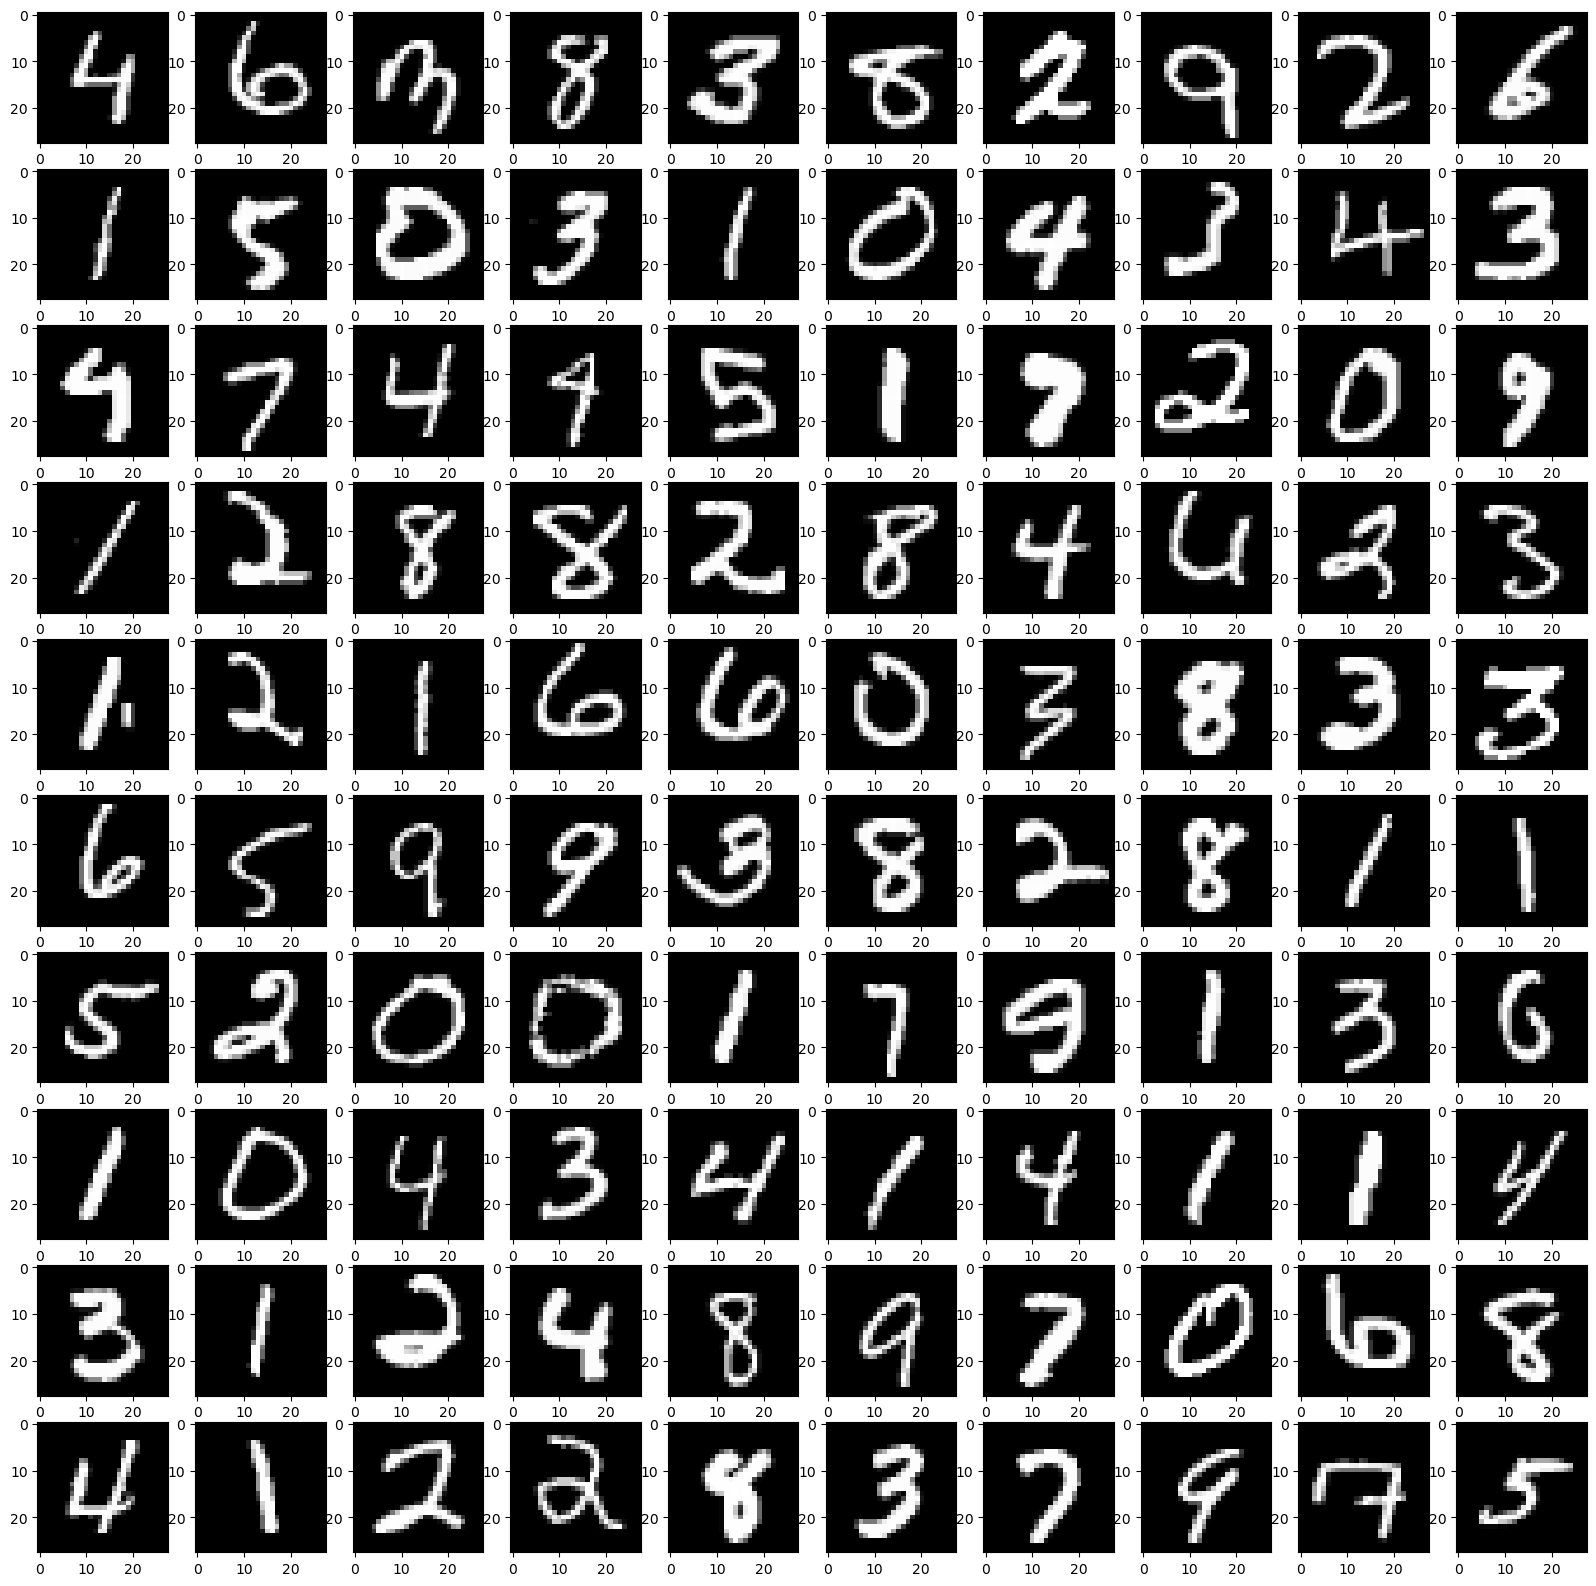

In [20]:
shuffled_data=shuffle(digit_data)
rows,cols=10,10

plt.figure(figsize=(20,20))

for i in range(rows * cols):
    plt.subplot(cols, rows,i+1)
    plt.imshow(shuffled_data[i].reshape(28,28),interpolation="nearest",cmap="gray")
    
plt.show()

In [21]:
data = np.concatenate((digit_data,letter_data))
target=np.concatenate((digit_target,letter_target))

print(data.shape,target.shape)

(442450, 28, 28, 1) (442450,)


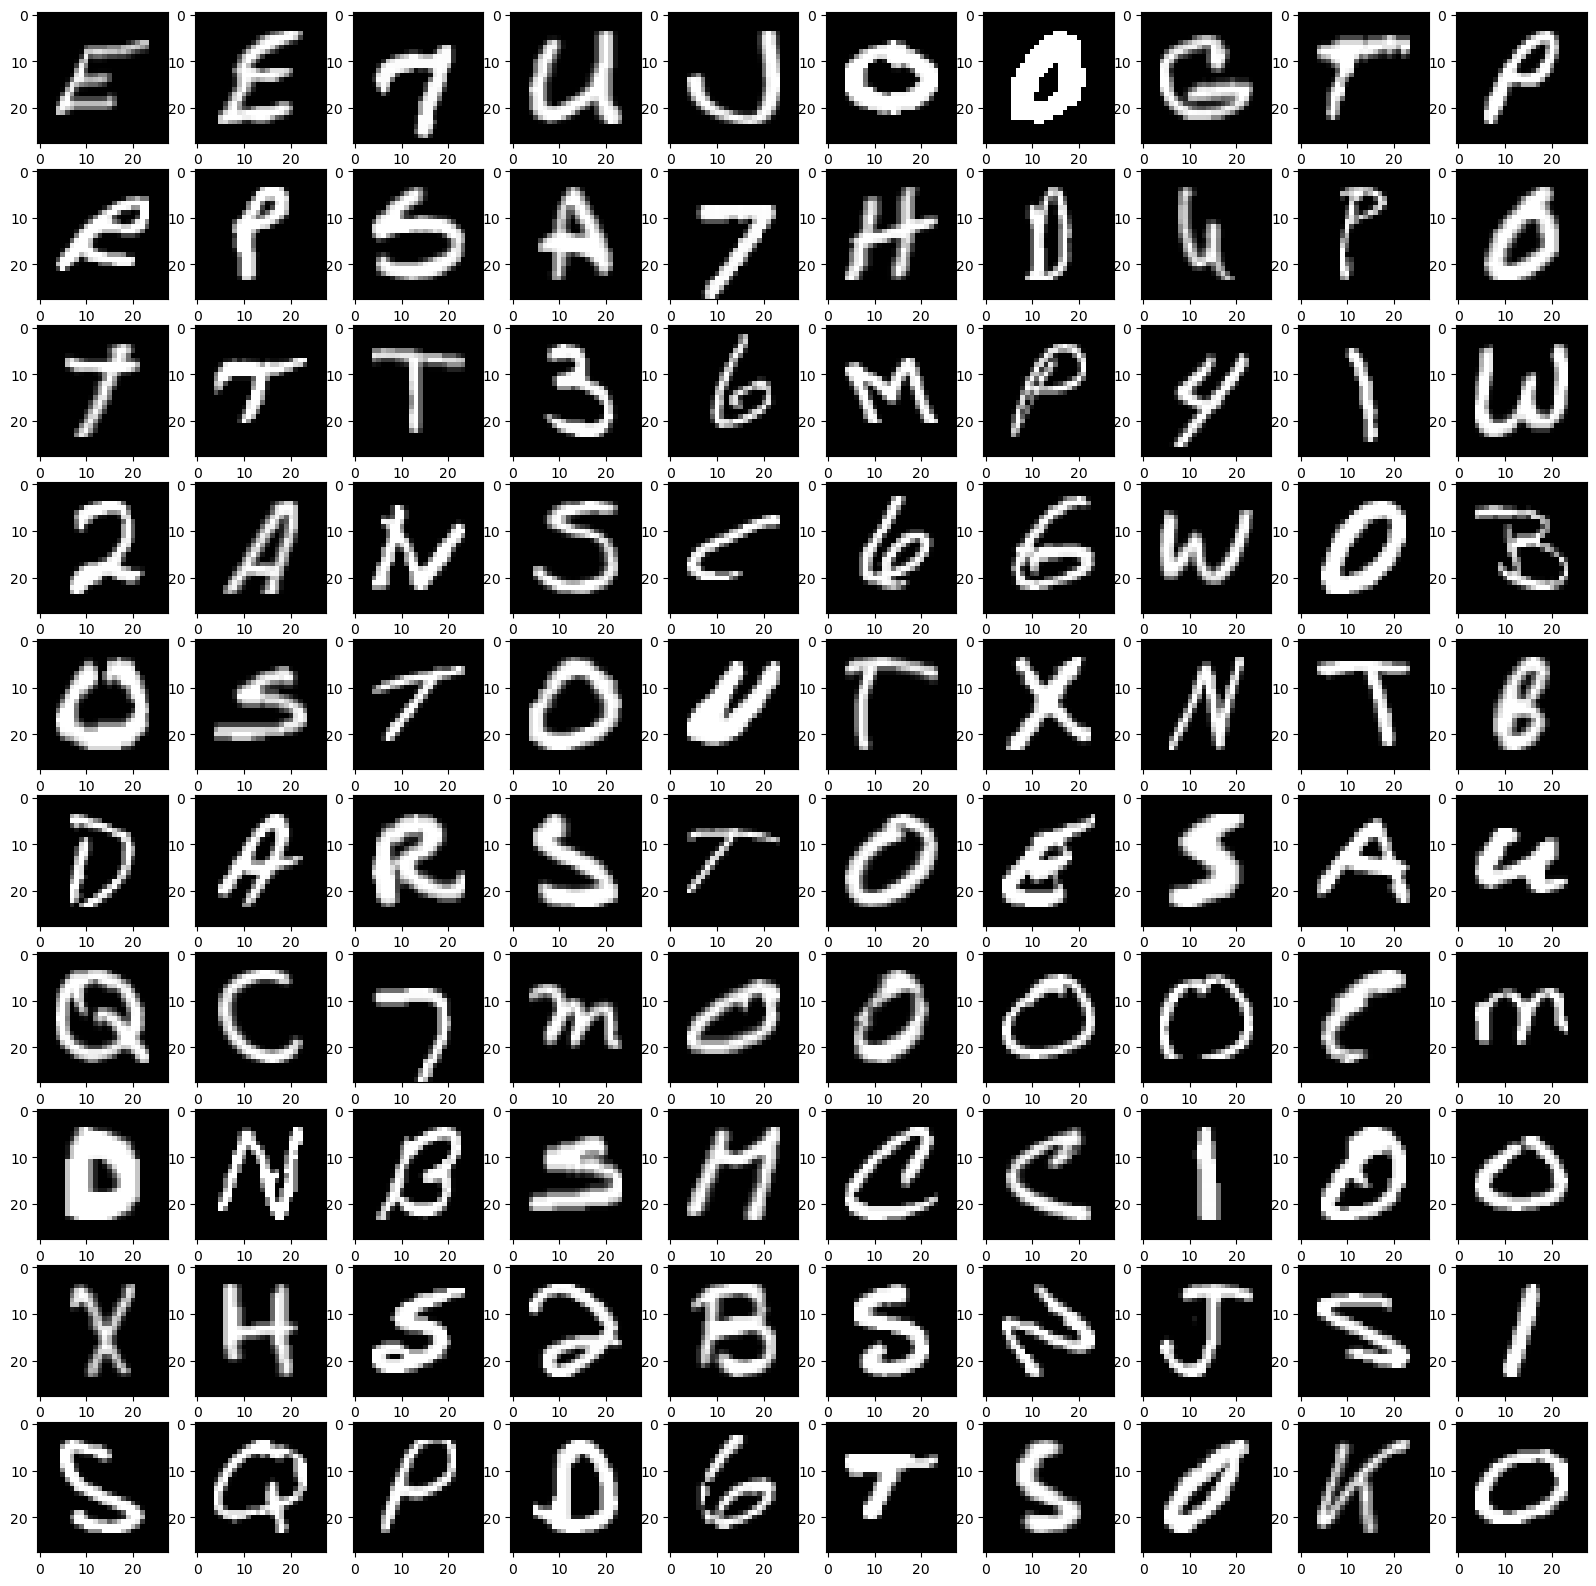

In [22]:
shuffled_data=shuffle(data)
rows,cols=10,10

plt.figure(figsize=(20,20))

for i in range(rows * cols):
    plt.subplot(cols, rows,i+1)
    plt.imshow(shuffled_data[i].reshape(28,28),interpolation="nearest",cmap="gray")
    
plt.show()

In [23]:
train_data,test_data,train_labels,test_labels=train_test_split(data,target,test_size=0.2)

In [24]:
print(train_data.shape,train_labels.shape)
print(test_data.shape,test_labels.shape)

(353960, 28, 28, 1) (353960,)
(88490, 28, 28, 1) (88490,)


In [25]:
train_data=train_data / 255.0
test_data+test_data / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

train_data = np.reshape(train_data,(train_data.shape[0],train_data.shape[1],train_data.shape[2],1))
test_data = np.reshape(test_data,(test_data.shape[0],test_data.shape[1],test_data.shape[2],1))

In [26]:
print(train_data.shape,test_data.shape)
print(train_labels.shape,test_labels.shape)

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 36) (88490, 36)


In [27]:
train_label_counts = [0 for i in range(36)]
test_label_counts = [0 for i in range(36)]

for i in range(train_data.shape[0]):
    train_label_counts[np.argmax(train_labels[i])] += 1
    
for i in range(test_data.shape[0]):
    test_label_counts[np.argmax(test_labels[i])] += 1

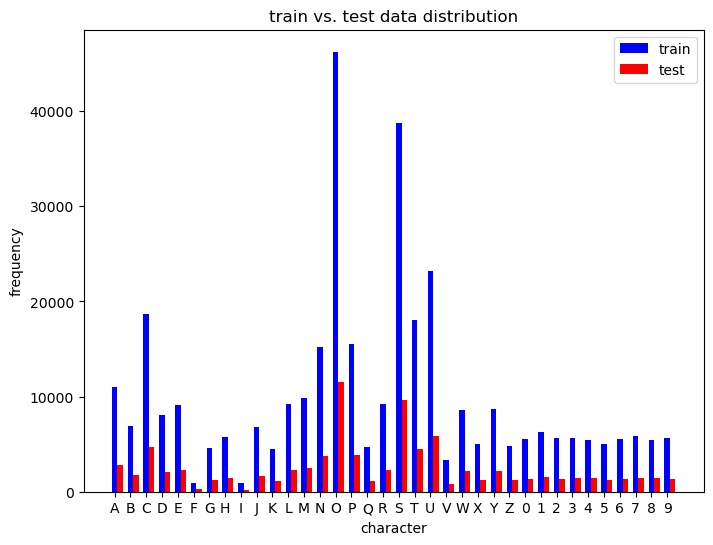

In [35]:
frequency = [
    train_label_counts , test_label_counts
]
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(1, 1, 1)
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z',0,1,2,3,4,5,6,7,8,9]

plt.xticks(np.arange(len(frequency[0])), x)
plt.title("train vs. test data distribution")
plt.xlabel("character")
plt.ylabel("frequency")

ax.bar(np.arange(len(frequency[0])), frequency[0], color="b", width=0.35)
ax.bar(np.arange(len(frequency[1])) + 0.35, frequency[1], color="r", width=0.35)
ax.legend(labels=["train", "test"], loc='upper right')


In [44]:
np.save("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\train_data.npy",train_data)
np.save("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\train_labels.npy",train_labels)
np.save("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\test_data.npy",test_data)
np.save("C:\\Users\\Tanishka\\anaconda3\\Lib\\site-packages\\numpy\\test_labels.npy",test_labels)